<a href="https://colab.research.google.com/github/Isreal-Oluwasegun/Facebook-Marketing-Post-Analysis-Using-Kmeans/blob/main/Analysing_Facebook_Marketing_Post_Uising_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/Live.csv')

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### -----------------------------------------------------------------------------------------------

# Preprocessing

In [ ]:
df.drop(columns=["status_id",
                      "status_published", "Column1",
                      "Column2",	"Column3",	"Column4"], inplace=True)

In [ ]:
fb_post = df.copy()

###### Removing non numerical

In [ ]:
fb_post.drop(columns=["status_id",	"status_type",	"status_published", "Column1",	"Column2",	"Column3",	"Column4"], inplace=True)

In [ ]:
fb_post

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


##### Scaling

In [ ]:
scaler = StandardScaler()
fb_scaled= scaler.fit_transform(fb_post)
fb_scaled

array([[ 0.64610394,  0.32335035,  1.6868788 , ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.17319166, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.00673846,  0.01308938,  0.12901714, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.49312768, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 0.26131603, -0.23871662, -0.13695924, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.46070173, -0.25220622, -0.3041444 , ..., -0.17600986,
        -0.152587  , -0.15574803]])

# Finding The Optimal Cluster Value

##### Elbow method (WCSS)

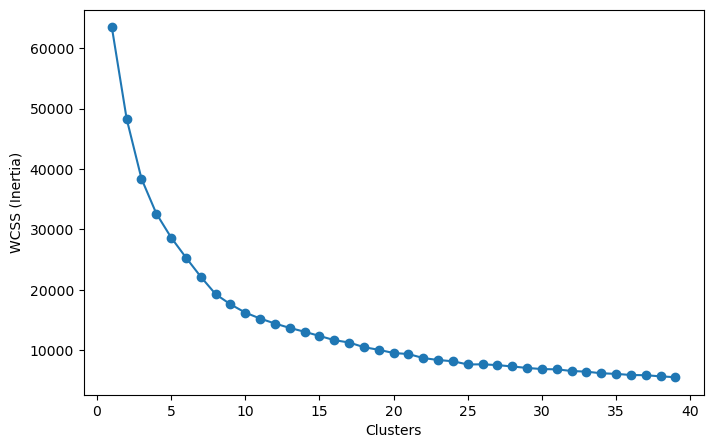

In [ ]:
wcss = []
n_clusters = np.arange(1, 40)
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42, n_init=10)
    kmeans.fit(fb_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.scatter(n_clusters, wcss)
plt.plot(n_clusters, wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

### 📌 Interpretation:

This tells that the best value for k is 6

##### Using CH index to find the optimal value for K

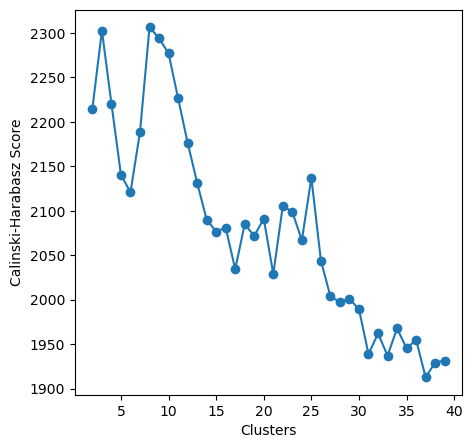

In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch = []
n_clusters = np.arange(2, 40)
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42, n_init=10)
    kmeans.fit(fb_scaled)
    ch_score = calinski_harabasz_score(fb_scaled, kmeans.labels_)
    ch.append(ch_score)

plt.figure(figsize=(5,5))
plt.scatter(n_clusters, ch)
plt.plot(n_clusters, ch)
plt.xlabel('Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

In [ ]:
# Find the best k (highest CH score)
best_k = n_clusters[np.argmax(ch)]
print(f"Optimal number of clusters: {best_k}")

Optimal number of clusters: 8


### 📌 Interpretation:

This tells that the best value for k is 8

##### Using Silhouette Score

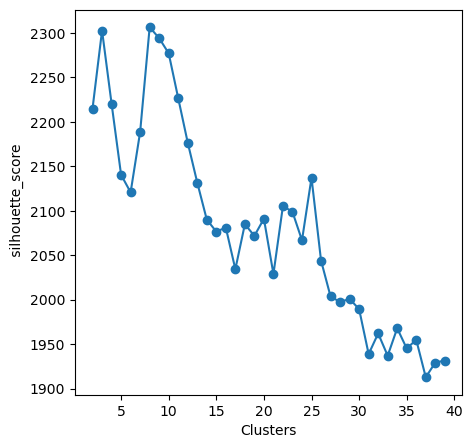

In [ ]:
from sklearn.metrics import silhouette_score

sil = []

n_clusters = np.arange(2, 40)
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42, n_init=10)
    kmeans.fit(fb_scaled)
    score = silhouette_score(fb_scaled, kmeans.labels_)
    sil.append(score)

plt.figure(figsize=(5,5))
plt.scatter(n_clusters, ch)
plt.plot(n_clusters, ch)
plt.xlabel('Clusters')
plt.ylabel(' silhouette_score')
plt.show()

In [ ]:
best_k_silhouette = n_clusters[np.argmax(sil)]
print(f"Best k based on Silhouette Score: {best_k_silhouette}")

Best k based on Silhouette Score: 2


### 📌 Interpretation:

This tells that the best value for k is 2

# Visualizing to determine best K using k=6, k=8, k=2

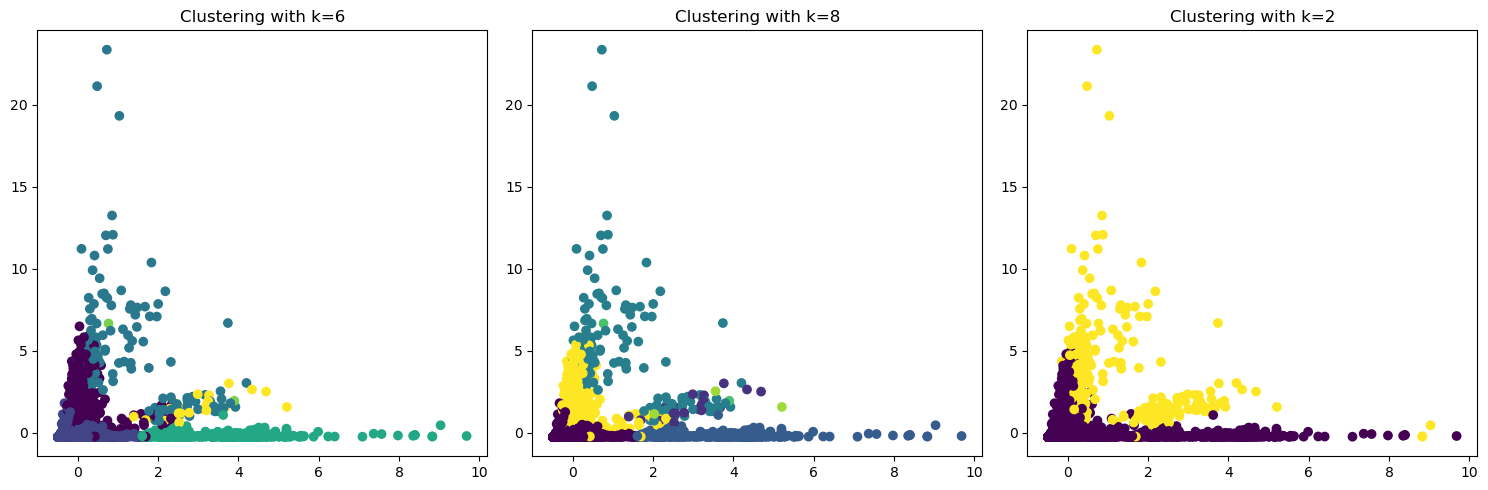

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
best_k_wcss, best_k_ch, best_k_silhouette = 6, 8, 2
# Loop through each k value and plot the clusters
for idx, k in enumerate([best_k_wcss, best_k_ch, best_k_silhouette]):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(fb_scaled)

    # Scatter plot of the clusters for each k
    ax[idx].scatter(fb_scaled[:, 0], fb_scaled[:, 1], c=clusters, cmap='viridis')
    ax[idx].set_title(f'Clustering with k={k}')

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()

# Inspecting deeper on the cluster by reducing the dimention with TSNE

In [ ]:
from sklearn.manifold import TSNE
tnse_df = TSNE(
    n_components=2,
    perplexity = 40,
    metric='euclidean',
    init='pca',
    verbose=1,
    random_state=42)
fb_tns = tnse_df.fit_transform(fb_scaled)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7050 samples in 0.079s...
[t-SNE] Computed neighbors for 7050 samples in 2.651s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7050
[t-SNE] Computed conditional probabilities for sample 2000 / 7050
[t-SNE] Computed conditional probabilities for sample 3000 / 7050
[t-SNE] Computed conditional probabilities for sample 4000 / 7050
[t-SNE] Computed conditional probabilities for sample 5000 / 7050
[t-SNE] Computed conditional probabilities for sample 6000 / 7050
[t-SNE] Computed conditional probabilities for sample 7000 / 7050
[t-SNE] Computed conditional probabilities for sample 7050 / 7050
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.211288
[t-SNE] KL divergence after 1000 iterations: 0.528649


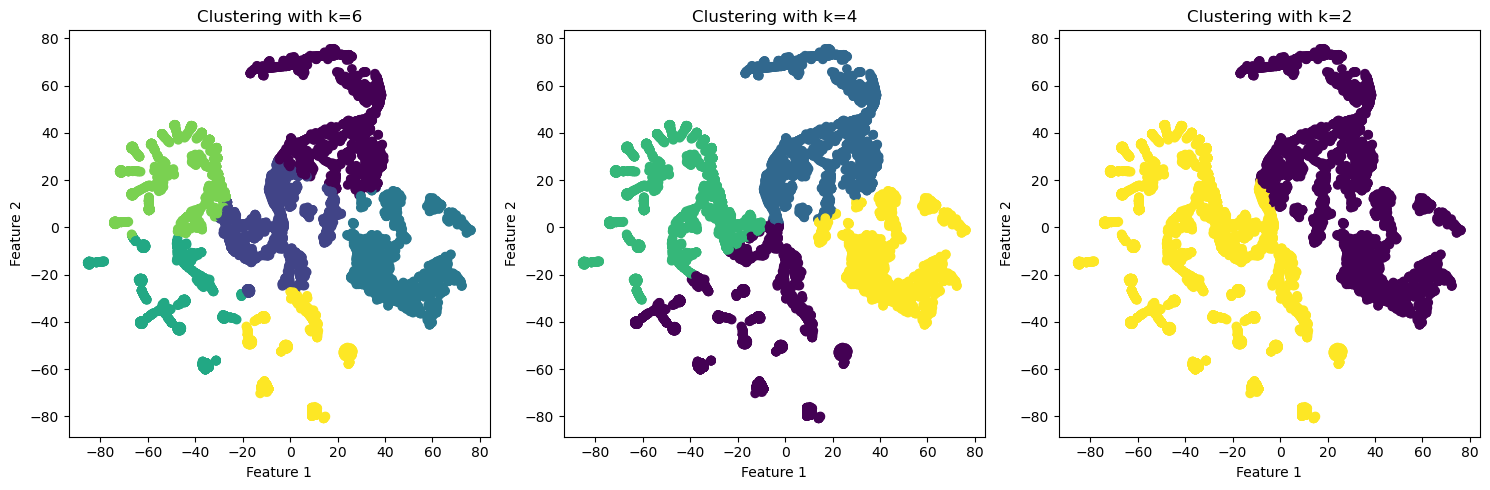

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Best k values based on WCSS, CH Score, and Silhouette Score
best_k_wcss, best_k_ch, best_k_silhouette = 6, 4, 2

# Create 3 subplots (one for each k)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each k value and plot the clusters
for idx, k in enumerate([best_k_wcss, best_k_ch, best_k_silhouette]):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(fb_tns)  # Use fb_tns (your dataset)

    # Scatter plot of the clusters for each k
    ax[idx].scatter(fb_tns[:, 0], fb_tns[:, 1], c=clusters, cmap='viridis')
    ax[idx].set_title(f'Clustering with k={k}')
    ax[idx].set_xlabel('Feature 1')  # Add axis labels
    ax[idx].set_ylabel('Feature 2')

plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()


# Building Kmeans with K = 2 as Optimal value

In [ ]:
optimal_k = 2
Kmean = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = Kmean.fit_predict(fb_scaled)

##### Segment

In [ ]:
seg = {i: segment for i, segment in enumerate(df["status_type"])}

# Map the 'Cluster' column to 'status_type' using the dictionary
df["Mapped_Status_Type"] = df["Cluster"].map(seg)

# Display the updated DataFrame
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster,Mapped_Status_Type
0,video,529,512,262,432,92,3,1,1,0,0,video
1,photo,150,0,0,150,0,0,0,0,0,0,video
2,video,227,236,57,204,21,1,1,0,0,0,video
3,photo,111,0,0,111,0,0,0,0,0,0,video
4,photo,213,0,0,204,9,0,0,0,0,0,video
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0,video
7046,photo,16,0,0,14,1,0,1,0,0,0,video
7047,photo,2,0,0,1,1,0,0,0,0,0,video
7048,photo,351,12,22,349,2,0,0,0,0,0,video


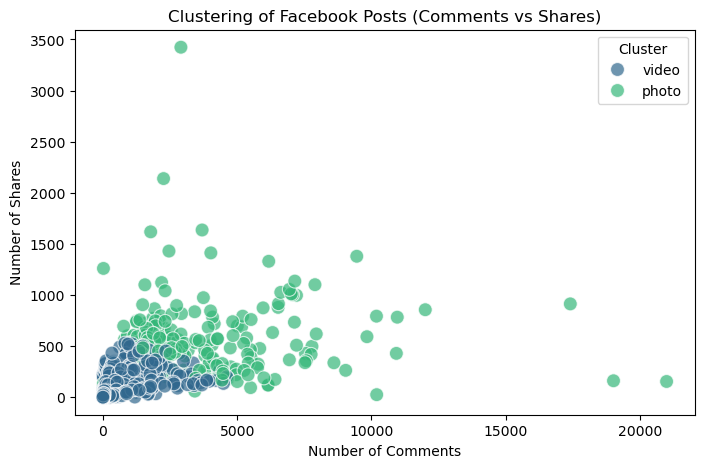

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["num_comments"], y=df["num_shares"], hue=df["Mapped_Status_Type"], palette="viridis", s=100, alpha=0.7)
plt.xlabel("Number of Comments")
plt.ylabel("Number of Shares")
plt.title("Clustering of Facebook Posts (Comments vs Shares)")
plt.legend(title="Cluster")
plt.show()

In [ ]:
df["Mapped_Status_Type"].unique()

array(['video', 'photo'], dtype=object)

In [ ]:
# Analyze each cluster
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_summary = df.groupby("Cluster")[numeric_columns].agg('mean')

# Compute silhouette score (higher is better)
silhouette_avg = silhouette_score(fb_scaled, df["Cluster"])

In [ ]:
cluster_summary

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
Cluster,,,,,,,,,,
0,206.013725,104.041913,21.208973,197.605962,7.233471,0.646104,0.331169,0.142710,0.051505,0.0
1,826.193431,3199.715328,505.281022,646.262774,148.624088,17.197080,9.729927,2.740876,1.638686,1.0


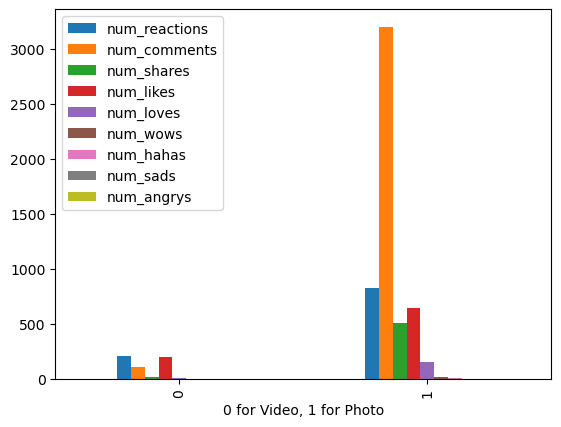

In [ ]:
cluster_summary.drop(columns= 'Cluster').plot(kind = 'bar')
plt.xlabel("0 for Video, 1 for Photo")
plt.show()

##### Silhoutte Average

In [ ]:
round(silhouette_avg,2)

0.82

# Interpretation of Analysis